<img src="https://i.postimg.cc/ydZcb9cY/Hello.jpg">

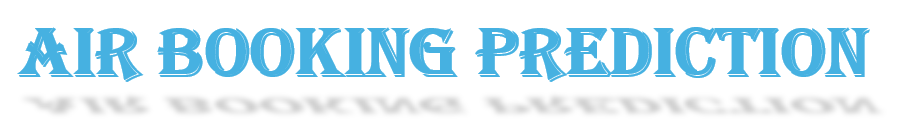

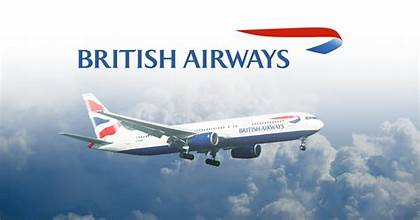

<a id="setup"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/C5rCv1td/th1.jpg);font-family:tahoma;font-size:120%;color:WHITE;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step1 | Python Libraries</p></b></h1>

In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
print("Setup Complete")

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Setup Complete


<a id="data"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/C5rCv1td/th1.jpg);font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step2 | Data</p></b></h1>

In [2]:
# Loading the dataset
df = pd.read_csv('air_customer_booking.csv')

In [3]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,261,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [4]:
## df is a DataFrame, df.shape would return a tuple like (n_rows, n_columns)
df.shape

(50000, 14)

In [5]:
## statistical summary of the numerical columns
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940460,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451339,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [6]:
##to obtain a concise summary of the DataFrame's structure and content
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [7]:
##  is used to remove duplicate rows from the DataFrame 
df = df.drop_duplicates()

In [8]:
## in pandas to obtain a summary of missing (null or NaN) values in each column of a DataFrame
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [9]:
## df is a DataFrame, df.shape would return a tuple like (n_rows, n_columns)
df.shape

(49281, 14)

<a id="preprocessing"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/C5rCv1td/th1.jpg);font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 3 | Data Visualization</p></b></h1>

In [10]:
## statistical summary of the numerical columns
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,1.590187,84.723260,23.053976,9.070676,0.668229,0.295631,0.426635,7.279974,0.149977
std,1.016538,90.410189,33.832149,5.413099,0.470854,0.456331,0.494593,1.496390,0.357052
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [11]:
##to obtain a concise summary of the DataFrame's structure and content
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49281 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49281 non-null  int64  
 1   sales_channel          49281 non-null  object 
 2   trip_type              49281 non-null  object 
 3   purchase_lead          49281 non-null  int64  
 4   length_of_stay         49281 non-null  int64  
 5   flight_hour            49281 non-null  int64  
 6   flight_day             49281 non-null  object 
 7   route                  49281 non-null  object 
 8   booking_origin         49281 non-null  object 
 9   wants_extra_baggage    49281 non-null  int64  
 10  wants_preferred_seat   49281 non-null  int64  
 11  wants_in_flight_meals  49281 non-null  int64  
 12  flight_duration        49281 non-null  float64
 13  booking_complete       49281 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ MB


In [12]:
# Unique value of each column
unique_values_per_column = {}

columns_to_check = ['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete']

for col in columns_to_check:
    unique_values = df[col].unique()
    unique_values_per_column[col] = unique_values
    print(f"Unique values for {col}: {unique_values}")
    print('============='*4)

Unique values for num_passengers: [2 1 3 4 6 5 7 9 8]
Unique values for sales_channel: ['Internet' 'Mobile']
Unique values for trip_type: ['RoundTrip' 'CircleTrip' 'OneWay']
Unique values for purchase_lead: [261 112 243  96  68   3 201 238  80 378 185   8 265 245 192 259  19  67
 351 228  21  23  25  16  66  51  37 101   7   5  33  20  56  13  71 346
   9  65 221 107  14  77  24  47  22  11  35 272 250 161 128 190 311  27
 314 102   2  26  32  57 198 120  69 281 282  15  31 316 232 156 196 283
  34  63   6 227 181 138 134  85  93 118  90 168 127  18 153 186 263 172
 230  42  81 140 285 179 341 173 180 366 229 174  82  75 163 105 276 110
  83 154  55  45  54 193  10 166  97 239 182  99  53  28 384  70 126 142
  87  86 313  41  91 206 197 268 157 145 241 139  59 396 280  79 380 132
 121 419  58 115 236 225 116 191 275 417 159  92 106 218 295  12 305 235
 332 125 204 310 368 169 214 155 325 130 189 226 122  88 211 188 129 149
  38 194 183  40  95 135 222  64 162 150  73 133  89 151 349  2

In [13]:
## This plot visualizes the distribution of classes within the specified column
def dist_plot(col):
  sns.countplot(x=col, data=df)
  plt.title('Class Distribution')
  plt.show()

In [14]:
## calculates and prints the number of samples in each category of a specified column
def category_counts(col):
  category_counts = df[col].value_counts()

  print("Number of samples in each category:")
  print(category_counts)

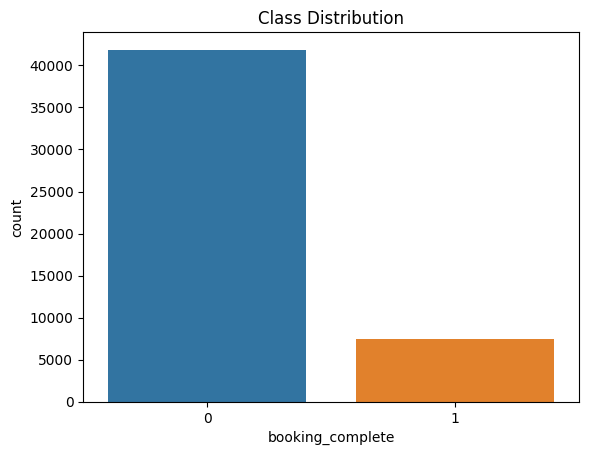

Number of samples in each category:
booking_complete
0    41890
1     7391
Name: count, dtype: int64


In [15]:
dist_plot("booking_complete")
category_counts("booking_complete")


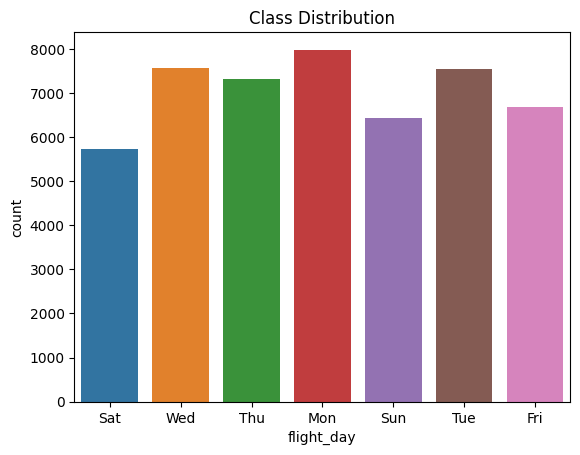

Number of samples in each category:
flight_day
Mon    7988
Wed    7562
Tue    7558
Thu    7323
Fri    6685
Sun    6442
Sat    5723
Name: count, dtype: int64


In [16]:
dist_plot("flight_day")
category_counts("flight_day")

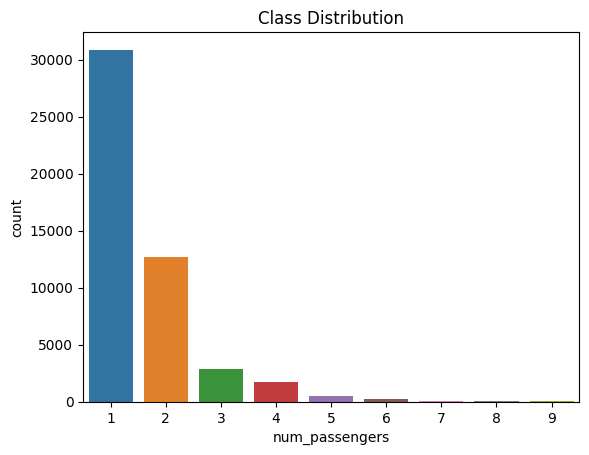

Number of samples in each category:
num_passengers
1    30879
2    12669
3     2882
4     1767
5      544
6      281
7      107
8       88
9       64
Name: count, dtype: int64


In [17]:
dist_plot("num_passengers")
category_counts("num_passengers")

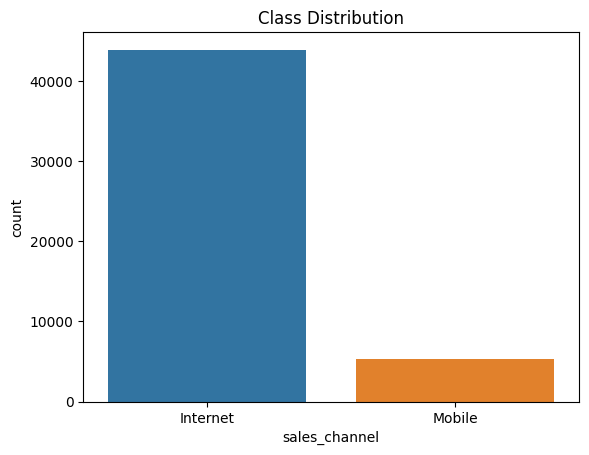

Number of samples in each category:
sales_channel
Internet    43917
Mobile       5364
Name: count, dtype: int64


In [18]:
dist_plot("sales_channel")
category_counts("sales_channel")


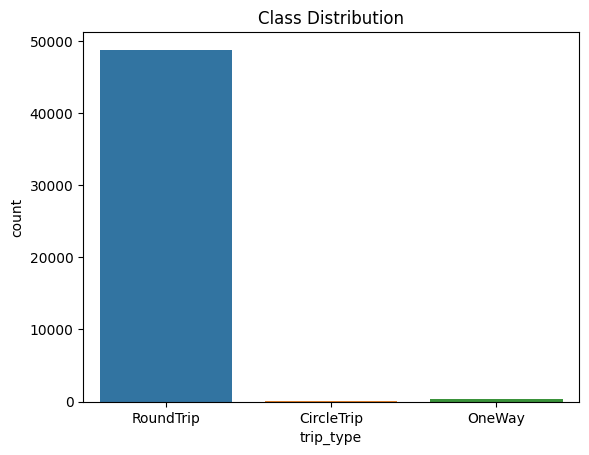

Number of samples in each category:
trip_type
RoundTrip     48779
OneWay          386
CircleTrip      116
Name: count, dtype: int64


In [19]:
dist_plot("trip_type")
category_counts("trip_type")


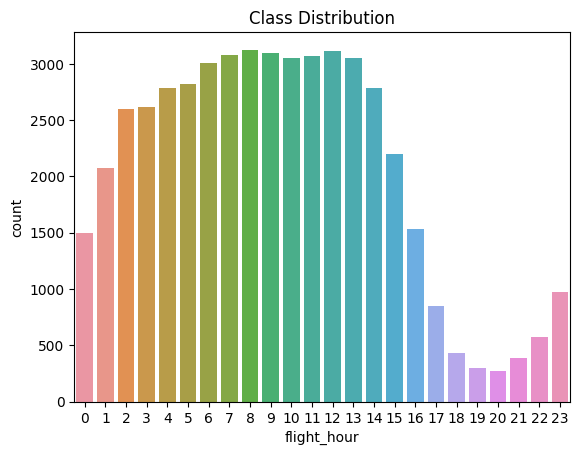

Number of samples in each category:
flight_hour
8     3125
12    3114
9     3097
7     3080
11    3071
10    3050
13    3046
6     3010
5     2817
4     2786
14    2783
3     2616
2     2596
15    2201
1     2071
16    1536
0     1501
23     975
17     848
22     573
18     430
21     386
19     294
20     275
Name: count, dtype: int64


In [20]:
dist_plot("flight_hour")
category_counts("flight_hour")

In [21]:
# dist_plot("route")
category_counts("route")

Number of samples in each category:
route
AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
          ... 
AKLHGH       1
JEDPDG       1
JEDPEN       1
DACPEK       1
MRUXIY       1
Name: count, Length: 799, dtype: int64


In [22]:
category_counts("purchase_lead")

Number of samples in each category:
purchase_lead
1      681
2      666
6      649
7      636
5      611
      ... 
614      1
641      1
557      1
577      1
867      1
Name: count, Length: 470, dtype: int64


In [23]:
category_counts("length_of_stay")

Number of samples in each category:
length_of_stay
6      7611
5      7151
4      5568
3      2798
17     1823
       ... 
242       1
392       1
431       1
513       1
329       1
Name: count, Length: 335, dtype: int64


In [24]:
category_counts("booking_origin")

Number of samples in each category:
booking_origin
Australia               17691
Malaysia                 7055
South Korea              4502
Japan                    3819
China                    3284
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64


In [25]:
bookings_with_meals = df[(df['booking_complete'] == 1) & (df['wants_in_flight_meals'] == 1)]
bookings_without_meals = df[(df['booking_complete'] == 1) & (df['wants_in_flight_meals'] == 0)]

# Get the category counts for 'booking_complete'
category_counts_1 = bookings_with_meals['booking_complete'].value_counts()
category_counts_0 = bookings_without_meals['booking_complete'].value_counts()

print("Number of bookings where passengers want in-flight meals:")
print(category_counts_1)

print("\nNumber of bookings where passengers don't want in-flight meals:")
print(category_counts_0)

Number of bookings where passengers want in-flight meals:
booking_complete
1    3383
Name: count, dtype: int64

Number of bookings where passengers don't want in-flight meals:
booking_complete
1    4008
Name: count, dtype: int64


In [26]:
bookings_with_meals = df[(df['booking_complete'] == 1) & (df['wants_extra_baggage'] == 1)]
bookings_without_meals = df[(df['booking_complete'] == 1) & (df['wants_extra_baggage'] == 0)]

# Get the category counts for 'booking_complete'
category_counts_1 = bookings_with_meals['booking_complete'].value_counts()
category_counts_0 = bookings_without_meals['booking_complete'].value_counts()

print("Number of bookings where passengers want in-flight extra baggage:")
print(category_counts_1)

print("\nNumber of bookings where passengers don't want in-flight extra baggage:")
print(category_counts_0)

Number of bookings where passengers want in-flight extra baggage:
booking_complete
1    5506
Name: count, dtype: int64

Number of bookings where passengers don't want in-flight extra baggage:
booking_complete
1    1885
Name: count, dtype: int64


In [27]:
def get_category_counts(df, booking, meals, baggage):
    filtered_df = df[(df['booking_complete'] == booking) & (df['wants_in_flight_meals'] == meals) & (df['wants_extra_baggage'] == baggage)]
    category_counts = filtered_df['booking_complete'].value_counts()
    return category_counts

def print_category_counts(category_counts, booking, meals, baggage):
    print(f"Category counts for 'booking_complete' when it is {booking}, 'wants_in_flight_meals' is {meals}, and 'wants_extra_baggage' is {baggage}:")
    print(category_counts)

# Assuming your DataFrame is named 'df'
# Example usage
filtered_df_1_1 = get_category_counts(df, 1, 1, 1)
filtered_df_1_0 = get_category_counts(df, 1, 1, 0)
filtered_df_0_1 = get_category_counts(df, 1, 0, 1)
filtered_df_0_0 = get_category_counts(df, 1, 0, 0)

print_category_counts(filtered_df_1_1, 1, 1, 1)
print_category_counts(filtered_df_1_0, 1, 1, 0)
print_category_counts(filtered_df_0_1, 1, 0, 1)
print_category_counts(filtered_df_0_0, 1, 0, 0)

Category counts for 'booking_complete' when it is 1, 'wants_in_flight_meals' is 1, and 'wants_extra_baggage' is 1:
booking_complete
1    2801
Name: count, dtype: int64
Category counts for 'booking_complete' when it is 1, 'wants_in_flight_meals' is 1, and 'wants_extra_baggage' is 0:
booking_complete
1    582
Name: count, dtype: int64
Category counts for 'booking_complete' when it is 1, 'wants_in_flight_meals' is 0, and 'wants_extra_baggage' is 1:
booking_complete
1    2705
Name: count, dtype: int64
Category counts for 'booking_complete' when it is 1, 'wants_in_flight_meals' is 0, and 'wants_extra_baggage' is 0:
booking_complete
1    1303
Name: count, dtype: int64


In [28]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

label_mapping = {}
for column in ['sales_channel', 'trip_type', 'booking_origin', 'route']:
    df[column] = label_encoder.fit_transform(df[column])
    label_mapping[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


In [29]:
for column, mapping in label_mapping.items():
    print(f"Mapping for {column}:\n", mapping)
    print('============='*5)

Mapping for sales_channel:
 {'Internet': 0, 'Mobile': 1}
Mapping for trip_type:
 {'CircleTrip': 0, 'OneWay': 1, 'RoundTrip': 2}
Mapping for booking_origin:
 {'(not set)': 0, 'Afghanistan': 1, 'Algeria': 2, 'Argentina': 3, 'Australia': 4, 'Austria': 5, 'Bahrain': 6, 'Bangladesh': 7, 'Belarus': 8, 'Belgium': 9, 'Bhutan': 10, 'Brazil': 11, 'Brunei': 12, 'Bulgaria': 13, 'Cambodia': 14, 'Canada': 15, 'Chile': 16, 'China': 17, 'Colombia': 18, 'Croatia': 19, 'Cyprus': 20, 'Czech Republic': 21, 'Czechia': 22, 'Denmark': 23, 'Egypt': 24, 'Estonia': 25, 'Finland': 26, 'France': 27, 'Germany': 28, 'Ghana': 29, 'Gibraltar': 30, 'Greece': 31, 'Guam': 32, 'Guatemala': 33, 'Hong Kong': 34, 'Hungary': 35, 'India': 36, 'Indonesia': 37, 'Iran': 38, 'Iraq': 39, 'Ireland': 40, 'Israel': 41, 'Italy': 42, 'Japan': 43, 'Jordan': 44, 'Kazakhstan': 45, 'Kenya': 46, 'Kuwait': 47, 'Laos': 48, 'Lebanon': 49, 'Macau': 50, 'Malaysia': 51, 'Maldives': 52, 'Malta': 53, 'Mauritius': 54, 'Mexico': 55, 'Mongolia': 56, '

In [30]:
ordinal_mapping = {
    'Mon': 1,
    'Tue': 2,
    'Wed': 3,
    'Thu': 4,
    'Fri': 5,
    'Sat': 6,
    'Sun': 7
}

df['flight_day'] = df['flight_day'].map(ordinal_mapping)

In [31]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,261,19,7,6,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,6,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,3,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,6,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,3,0,36,1,0,1,5.52,0


In [32]:
df.tail()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
49995,2,0,2,27,6,9,6,720,4,1,0,1,5.62,0
49996,1,0,2,111,6,4,7,720,4,0,0,0,5.62,0
49997,1,0,2,24,6,22,6,720,4,0,0,1,5.62,0
49998,1,0,2,15,6,11,1,720,4,1,0,1,5.62,0
49999,1,0,2,19,6,10,4,720,4,0,1,0,5.62,0


In [62]:
## in pandas to obtain a summary of missing (null or NaN) values in each column of a DataFrame
df.isnull().sum()

num_passengers                    0
sales_channel                     0
trip_type                         0
purchase_lead                     0
length_of_stay                    0
flight_day                        0
route                             0
booking_origin                    0
wants_extra_baggage               0
wants_preferred_seat              0
wants_in_flight_meals             0
booking_complete                  0
flight_hour_bin                   0
flight_arrival                    0
flight_duration_scaled            0
route_frequency_encoded_scaled    0
dtype: int64

In [33]:
df.corr()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,-0.006202,0.002097,0.214999,-0.115380,0.016393,0.014801,-0.048727,0.053137,0.120724,0.029509,0.022252,-0.062028,0.024092
sales_channel,-0.006202,1.000000,0.021065,-0.014501,-0.058197,0.023650,0.042285,-0.020097,0.029076,-0.055956,0.029160,-0.026013,-0.036642,-0.039320
trip_type,0.002097,0.021065,1.000000,-0.008874,0.006498,-0.002848,-0.001573,-0.008887,0.002392,-0.014516,0.005340,0.011819,-0.039410,0.027251
purchase_lead,0.214999,-0.014501,-0.008874,1.000000,-0.076747,0.035112,0.036213,-0.107474,0.047089,-0.021600,-0.004459,-0.022533,0.067934,-0.022132
length_of_stay,-0.115380,-0.058197,0.006498,-0.076747,1.000000,-0.025525,0.000756,0.004259,-0.110038,0.177536,0.031215,0.098846,0.140408,-0.042080
flight_hour,0.016393,0.023650,-0.002848,0.035112,-0.025525,1.000000,0.024212,-0.015862,0.042461,-0.010911,0.012251,0.011953,-0.003236,0.006705
flight_day,0.014801,0.042285,-0.001573,0.036213,0.000756,0.024212,1.000000,-0.015884,-0.009320,-0.002517,0.005723,0.007799,0.019187,-0.007061
route,-0.048727,-0.020097,-0.008887,-0.107474,0.004259,-0.015862,-0.015884,1.000000,-0.067258,0.026372,0.016367,-0.011357,-0.136428,-0.007911
booking_origin,0.053137,0.029076,0.002392,0.047089,-0.110038,0.042461,-0.009320,-0.067258,1.000000,-0.029751,-0.050991,-0.084647,-0.232650,0.130984
wants_extra_baggage,0.120724,-0.055956,-0.014516,-0.021600,0.177536,-0.010911,-0.002517,0.026372,-0.029751,1.000000,0.208392,0.216835,0.057637,0.068452


In [34]:
# Binning or Discretization: Convert numerical features into bins or discrete categories.
bins = [0, 6, 12, 18, 24]
labels = ['night', 'morning', 'afternoon', 'evening']

# Create a new column with the bin labels
df['flight_hour_bin'] = pd.cut(df['flight_hour'], bins=bins, labels=labels, include_lowest=True, right=False)

In [35]:
label_encoder = LabelEncoder()

df['flight_hour_bin'] = label_encoder.fit_transform(df['flight_hour_bin'])

# Print the mapping between original labels and encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'afternoon': 0, 'evening': 1, 'morning': 2, 'night': 3}


In [36]:
df['flight_arrival'] = (df['flight_hour'] + df['flight_duration']) % 24

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['flight_duration_scaled'] = scaler.fit_transform(df[['flight_duration']])

In [38]:
# Count or Frequency Encoding: If you have a categorical feature with a large number of unique values, encode it based on the frequency of each category.
frequency_encoding = df['route'].value_counts(normalize=True)
df['route_frequency_encoded'] = df['route'].map(frequency_encoding)

df['route_frequency_encoded_scaled'] = scaler.fit_transform(df[['route_frequency_encoded']])

In [39]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_hour_bin,flight_arrival,flight_duration_scaled,route_frequency_encoded,route_frequency_encoded_scaled
0,2,0,2,261,19,7,6,0,61,1,0,0,5.52,0,2,12.52,0.175983,0.000406,0.007255
1,1,0,2,112,20,3,6,0,61,0,0,0,5.52,0,3,8.52,0.175983,0.000406,0.007255
2,2,0,2,243,22,17,3,0,36,1,1,0,5.52,0,0,22.52,0.175983,0.000406,0.007255
3,1,0,2,96,31,4,6,0,61,0,0,1,5.52,0,3,9.52,0.175983,0.000406,0.007255
4,2,0,2,68,22,15,3,0,36,1,0,1,5.52,0,0,20.52,0.175983,0.000406,0.007255


In [40]:
df.drop('route_frequency_encoded', axis=1, inplace=True)
df.drop('flight_duration', axis=1, inplace=True)
df.drop('flight_hour', axis=1, inplace=True)

In [41]:
df.corr()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete,flight_hour_bin,flight_arrival,flight_duration_scaled,route_frequency_encoded_scaled
num_passengers,1.000000,-0.006202,0.002097,0.214999,-0.115380,0.014801,-0.048727,0.053137,0.120724,0.029509,0.022252,0.024092,-0.022511,0.007215,-0.062028,0.009974
sales_channel,-0.006202,1.000000,0.021065,-0.014501,-0.058197,0.042285,-0.020097,0.029076,-0.055956,0.029160,-0.026013,-0.039320,-0.027810,-0.001652,-0.036642,-0.020187
trip_type,0.002097,0.021065,1.000000,-0.008874,0.006498,-0.001573,-0.008887,0.002392,-0.014516,0.005340,0.011819,0.027251,0.001783,-0.005834,-0.039410,0.016124
purchase_lead,0.214999,-0.014501,-0.008874,1.000000,-0.076747,0.036213,-0.107474,0.047089,-0.021600,-0.004459,-0.022533,-0.022132,-0.024809,-0.005638,0.067934,0.112131
length_of_stay,-0.115380,-0.058197,0.006498,-0.076747,1.000000,0.000756,0.004259,-0.110038,0.177536,0.031215,0.098846,-0.042080,0.037478,-0.002546,0.140408,0.053294
flight_day,0.014801,0.042285,-0.001573,0.036213,0.000756,1.000000,-0.015884,-0.009320,-0.002517,0.005723,0.007799,-0.007061,-0.015978,-0.013695,0.019187,0.013197
route,-0.048727,-0.020097,-0.008887,-0.107474,0.004259,-0.015884,1.000000,-0.067258,0.026372,0.016367,-0.011357,-0.007911,0.002498,0.000793,-0.136428,-0.325966
booking_origin,0.053137,0.029076,0.002392,0.047089,-0.110038,-0.009320,-0.067258,1.000000,-0.029751,-0.050991,-0.084647,0.130984,-0.072761,-0.014840,-0.232650,0.155958
wants_extra_baggage,0.120724,-0.055956,-0.014516,-0.021600,0.177536,-0.002517,0.026372,-0.029751,1.000000,0.208392,0.216835,0.068452,0.008189,0.012531,0.057637,0.009454
wants_preferred_seat,0.029509,0.029160,0.005340,-0.004459,0.031215,0.005723,0.016367,-0.050991,0.208392,1.000000,0.315162,0.050189,-0.007219,0.019998,0.100652,-0.032693


In [42]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_day', 'route', 'booking_origin',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'booking_complete', 'flight_hour_bin', 'flight_arrival',
       'flight_duration_scaled', 'route_frequency_encoded_scaled'],
      dtype='object')

<a id="modeling"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/C5rCv1td/th1.jpg);font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:10px; border:solid 4px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 4 | Modeling</p></b></h1>

In [43]:
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
#pip install --upgrade imbalanced-learn scikit-learn

In [46]:
#pip install --upgrade numpy scipy

In [47]:
#pip install scikit-learn==<compatible_version>

In [48]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Fit and apply SMOTE only on the training set to avoid information leakage
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print(pd.Series(y_train_resampled).value_counts())

booking_complete
0    33512
1    33512
Name: count, dtype: int64


<a id="rf"></a>
<h2><b><span style="color:#009b2d"> Step 4.1 | </span><span style="color:#9b006e">DecisionTreeClassifier</span></b></h2> 

In [49]:
DTs = DecisionTreeClassifier()
DTs.fit(X_train, y_train)
DTs_pred = DTs.predict(X_test)
DTs_acc = accuracy_score(DTs_pred, y_test)
print("Test accuracy: {:.2f}%".format(DTs_acc*100))

Test accuracy: 77.45%


In [50]:
print(classification_report(y_test, DTs_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      8378
           1       0.27      0.31      0.29      1479

    accuracy                           0.77      9857
   macro avg       0.57      0.58      0.58      9857
weighted avg       0.78      0.77      0.78      9857



<a id="DTs"></a>
<h2><b><span style="color:blue"> DecisionTreeClassifier:  </span><span style="color:red">77.45%</span></b></h2> 

<a id="rf"></a>
<h2><b><span style="color:#009b2d"> Step 4.2 | </span><span style="color:#9b006e">RandomForestClassifier</span></b></h2> 

In [51]:
Rfs = RandomForestClassifier()
Rfs.fit(X_train, y_train)
Rfs_pred = Rfs.predict(X_test)
Rfs_acc = accuracy_score(Rfs_pred, y_test)
print("Test accuracy: {:.2f}%".format(Rfs_acc*100))

Test accuracy: 85.04%


In [52]:
print(classification_report(y_test, Rfs_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8378
           1       0.51      0.10      0.16      1479

    accuracy                           0.85      9857
   macro avg       0.68      0.54      0.54      9857
weighted avg       0.81      0.85      0.80      9857



<a id="Rfs"></a>
<h2><b><span style="color:blue"> RandomForestClassifier:  </span><span style="color:red">85.04%</span></b></h2> 

<a id="rf"></a>
<h2><b><span style="color:#009b2d"> Step 4.3 | </span><span style="color:#9b006e">LogisticRegression</span></b></h2> 

In [53]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(lr_pred, y_test)
print("Test accuracy: {:.2f}%".format(lr_acc*100))

Test accuracy: 84.98%


In [54]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8378
           1       0.00      0.00      0.00      1479

    accuracy                           0.85      9857
   macro avg       0.42      0.50      0.46      9857
weighted avg       0.72      0.85      0.78      9857



<a id="lr"></a>
<h2><b><span style="color:blue"> LogisticRegression:  </span><span style="color:red">84.98%</span></b></h2> 

<a id="rf"></a>
<h2><b><span style="color:#009b2d"> Step 4.4 | </span><span style="color:#9b006e">SVC</span></b></h2> 

In [55]:
Svc = SVC()
Svc.fit(X_train, y_train)
Svc_pred = Svc.predict(X_test)
Svc_acc = accuracy_score(Svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(Svc_acc*100))

Test accuracy: 85.00%


In [56]:
print(classification_report(y_test, Svc_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8378
           1       0.00      0.00      0.00      1479

    accuracy                           0.85      9857
   macro avg       0.42      0.50      0.46      9857
weighted avg       0.72      0.85      0.78      9857



<a id="Svc"></a>
<h2><b><span style="color:blue"> SVC:  </span><span style="color:red">85.00%</span></b></h2> 

<a id="rf"></a>
<h2><b><span style="color:#009b2d"> Step 4.5 | </span><span style="color:#9b006e">KNeighborsClassifier</span></b></h2> 

In [57]:
Knn = KNeighborsClassifier()
Knn.fit(X_train, y_train)
Knn_pred = Knn.predict(X_test)
Knn_acc = accuracy_score(Knn_pred, y_test)
print("Test accuracy: {:.2f}%".format(Knn_acc*100))

Test accuracy: 83.43%


In [58]:
print(classification_report(y_test, Knn_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      8378
           1       0.38      0.16      0.22      1479

    accuracy                           0.83      9857
   macro avg       0.62      0.56      0.56      9857
weighted avg       0.79      0.83      0.80      9857



<a id="Knn"></a>
<h2><b><span style="color:blue"> Knn:  </span><span style="color:red">83.43%</span></b></h2> 

<a id="rf"></a>
<h2><b><span style="color:#009b2d"> Step 4.6 | </span><span style="color:#9b006e">XGBClassifier</span></b></h2> 

In [59]:
Xgb = XGBClassifier()
Xgb.fit(X_train, y_train)
Xgb_pred = Xgb.predict(X_test)
Xgb_acc = accuracy_score(Xgb_pred, y_test)
print("Test accuracy: {:.2f}%".format(Xgb_acc*100))

Test accuracy: 84.88%


In [60]:
print(classification_report(y_test, Xgb_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8378
           1       0.49      0.12      0.20      1479

    accuracy                           0.85      9857
   macro avg       0.67      0.55      0.56      9857
weighted avg       0.81      0.85      0.81      9857



<a id="Xgb"></a>
<h2><b><span style="color:blue"> XGBClassifier:  </span><span style="color:red">84.88%</span></b></h2> 

<a id="modeling"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/C5rCv1td/th1.jpg);font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:10px; border:solid 4px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 5 | ALL Model in DataFrame</p></b></h1>

In [61]:
result = pd.DataFrame({
    'Model': ['DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression','SVC', 'KNeighborsClassifier','XGBClassifier'],
    'Accuracy' : [DTs_acc, Rfs_acc, lr_acc, Svc_acc, Knn_acc,Xgb_acc]
})
result['Accuracy'] = result['Accuracy'].round(4)

result.sort_values(by='Accuracy', ascending=False)


,Model,Accuracy
1,RandomForestClassifier,0.8504
3,SVC,0.8500
2,LogisticRegression,0.8498
5,XGBClassifier,0.8488
4,KNeighborsClassifier,0.8343
0,DecisionTreeClassifier,0.7745


<div style="border-radius:20px; padding: 15px; font-size:100%; text-align:left; background-image: url(https://i.postimg.cc/0jG2Q5Nm/Adobe-Stock-522250922-Preview-Medium.jpg)">

<h3 style="font-size:185%; font-weight:bolder; color:#005f26">Results : </h3>

<span style="font-size:120%; font-weight:700; color:#005f26">Acording to the above plots, best Model  base on Score is :</span>

<span style="font-size:100%; font-weight:500; color:#005f26">
<ul><b>RandomForestClassifier</b></ul>
</br>
</span>

<span style="font-size:150%; font-weight:bolder; color:navy">So, We choose <mark> RandomForestClassifier </mark></span>
</div>

<img src='https://i.postimg.cc/t4b3WtCy/1000-F-291522205-Xkrm-S421-Fj-SGTMR.jpg'>